In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [6]:
###Loading the data

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


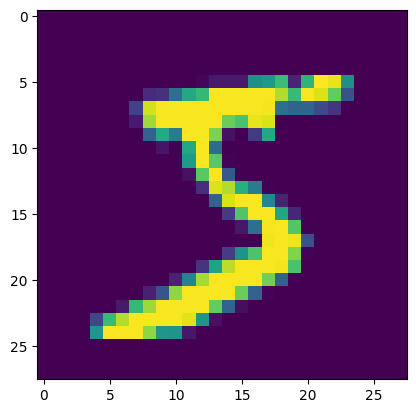

In [4]:
plt.imshow(X_train[0])

In [7]:
###Scaling

In [14]:
X_train[0].shape

(28, 28)

In [15]:
###Our images is if 20*20 dim

In [9]:
X_train.max() , X_test.max()

(255, 255)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Reshape
from tensorflow.keras.optimizers import SGD

In [12]:
## Our img data is og 28*28  i.e 784 features. we will slowly reduce the dimention

In [13]:
encoder = Sequential()

In [16]:
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [17]:
decoder = Sequential()

In [18]:
decoder.add(Dense(50,activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [19]:
autoencoder = Sequential([encoder,decoder])

In [20]:
autoencoder.compile(optimizer=SGD(learning_rate=1.5,),
                    loss='binary_crossentropy',
                    metrics = ['accuracy'])

In [21]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=[X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2531 - accuracy: 0.0833 - val_loss: 0.2182 - val_accuracy: 0.1162
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1962 - accuracy: 0.1474 - val_loss: 0.1717 - val_accuracy: 0.1810
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1637 - accuracy: 0.1914 - val_loss: 0.1567 - val_accuracy: 0.1948
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1506 - accuracy: 0.2088 - val_loss: 0.1450 - val_accuracy: 0.2127
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1431 - accuracy: 0.2205 - val_loss: 0.1409 - val_accuracy: 0.2195


In [22]:
passed_img = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 210ms/step


Orignal Image


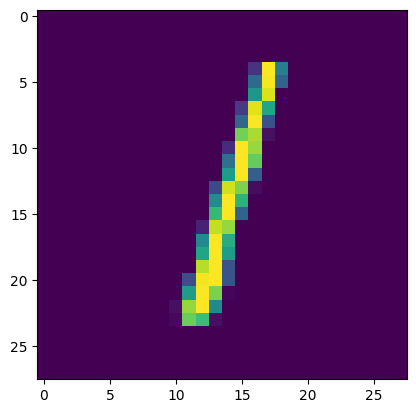

Attempted reconstruction


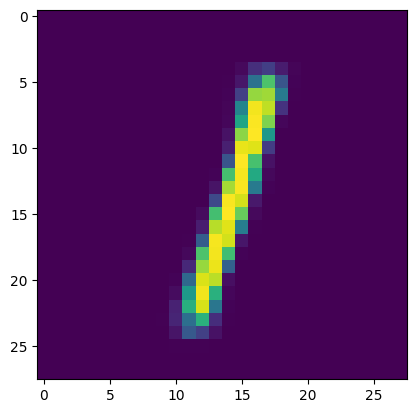

In [28]:
n=2
print("Orignal Image")
plt.imshow(X_test[n])
plt.show()
print("Attempted reconstruction")
plt.imshow(passed_img[n])
plt.show()

In [29]:
###Adding noise to images

In [31]:
from tensorflow.keras.layers import GaussianNoise

In [33]:
sample=GaussianNoise(0.2)

In [34]:
noise_img = sample(X_test[:10],training=True)

Orignal Image


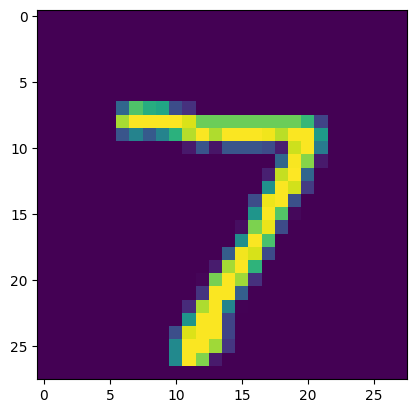

Noise Image


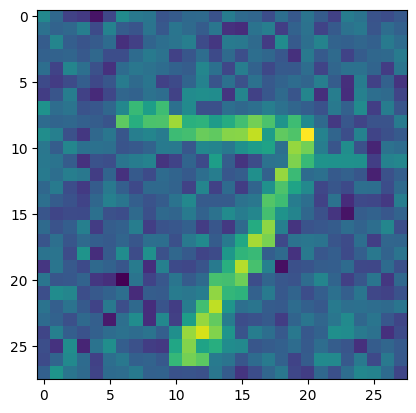

In [38]:
x = 0
print('Orignal Image')
plt.imshow(X_test[x])
plt.show()
print('Noise Image')
plt.imshow(noise_img[x])
plt.show()

In [52]:
###Noise Remover Model

In [39]:
encoder = Sequential()

In [40]:
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [41]:
decoder = Sequential()

In [42]:
decoder.add(Dense(50,activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [43]:
noise_remover = Sequential([encoder,decoder])

In [44]:
noise_remover.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
noise_remover.fit(X_train,X_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1694 - accuracy: 0.1811
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1303 - accuracy: 0.2307
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1213 - accuracy: 0.2440
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1150 - accuracy: 0.2540
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1115 - accuracy: 0.2608
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1089 - accuracy: 0.2651
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1067 - accuracy: 0.2690
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1051 - accuracy: 0.2732
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1038 - accuracy: 0.2765
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [46]:
denoised_img = noise_remover.predict(noise_img)

1/1 [==============================] - 0s 129ms/step


Orignal Image


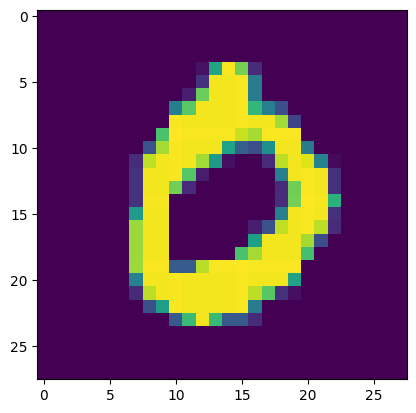

Noise Image


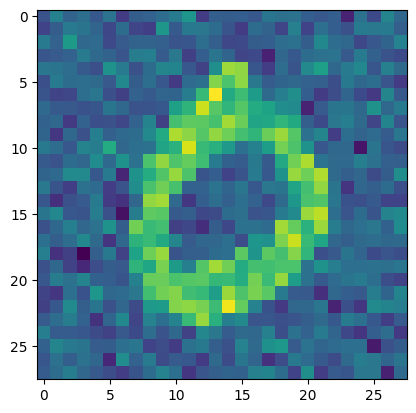

De-noised Image


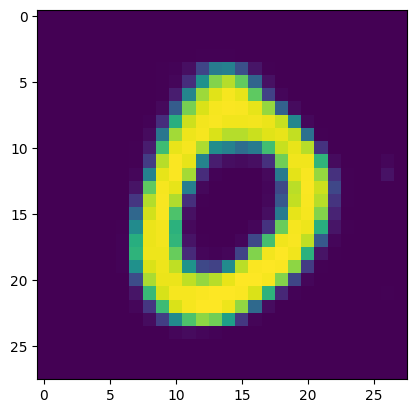

In [51]:
x = 3
print('Orignal Image')
plt.imshow(X_test[x])
plt.show()
print('Noise Image')
plt.imshow(noise_img[x])
plt.show()
print('De-noised Image')
plt.imshow(denoised_img[x])
plt.show()